In [6]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [4]:
titanic_data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
# checking datatype of each columns
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#checking shape of the data
titanic_data.shape

(891, 12)

In [10]:
#checking unique values
titanic_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [11]:
#checking null values
titanic_data.isnull().sum().sum()


866

<AxesSubplot:>

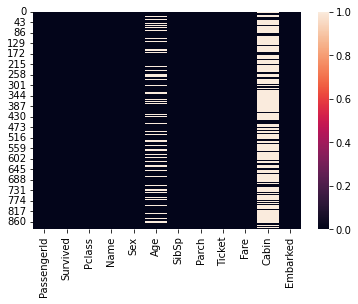

In [12]:
sns.heatmap(titanic_data.isnull())

it shows mull values is present in the age and cabin column

# Handling the missing values:

In [13]:
#Dropping  the “Cabin” column from the data frame as it won’t be of much importance nd it havin lot of missing values
titanic_data  = titanic_data.drop(columns='Cabin', axis=1)

In [14]:
#Replacing the missing values in the “Age” column with the mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [15]:
#Finding the mode value of the “Embarked” column as it will have occurred the maximum number of times
print(titanic_data['Embarked'].mode())

0    S
dtype: object


In [16]:
#Replacing the missing values in the “Embarked” column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)


In [17]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [18]:
#checking the null values again
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Transformation into a categorical column.

In [19]:
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)


In [20]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


We also see, that there are few columns, which are not of much importance in this process. Let us get rid of them.



# checking correlation

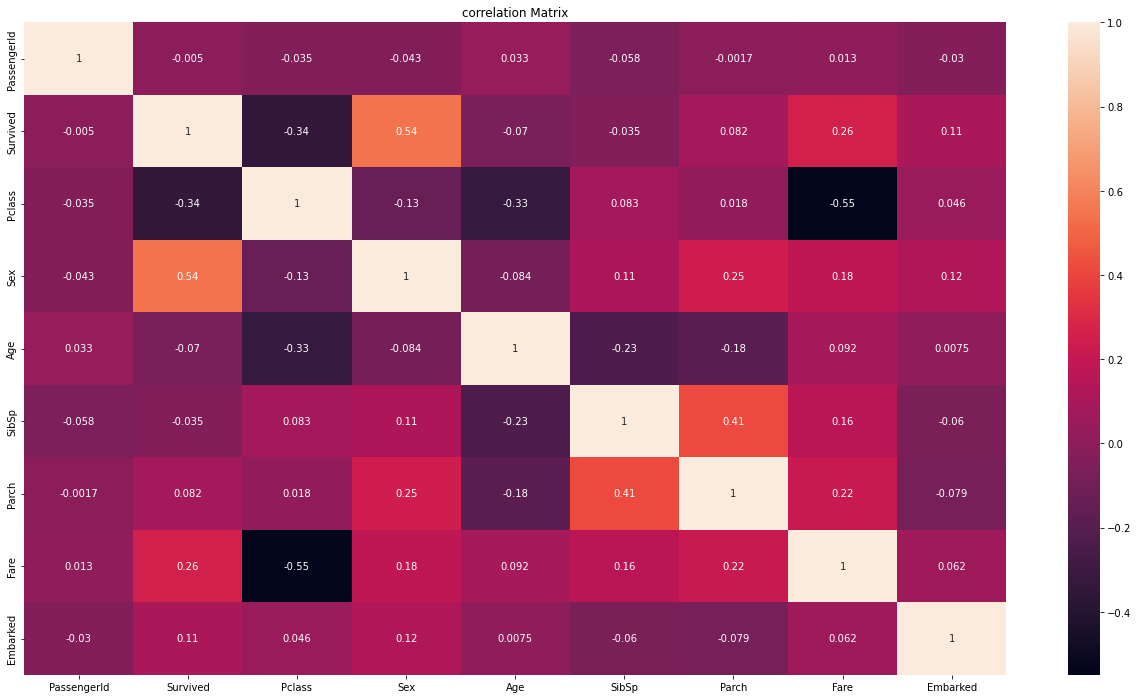

In [21]:
corr_mat=titanic_data.corr()#----------------> corelation function

plt.figure(figsize=[22,12])#-------> figure size dimetions
sns.heatmap(corr_mat,annot=True)#--> annot = true means will print values
plt.title("correlation Matrix")#---> title
plt.show()

In [22]:
titanic_data= titanic_data.drop(columns = ['PassengerId','Name','Ticket'],axis=1)

In [23]:
titanic_data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.361392
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.635673
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [24]:
titanic_data.shape

(891, 8)

# checking data distributions

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

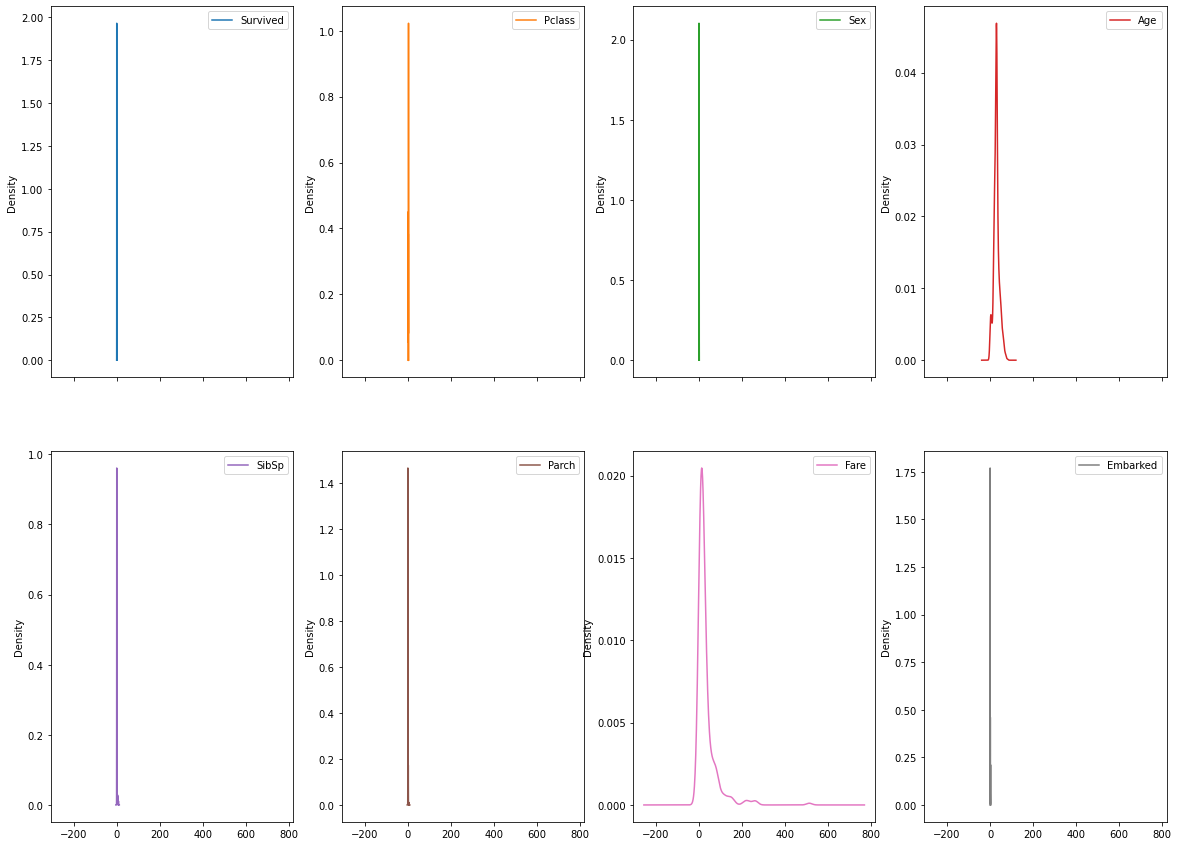

In [25]:
titanic_data.plot(kind='density',layout=(2,4),subplots=True,figsize=(20,15))

in some graphs skewness and outliers is present

# checking outliers

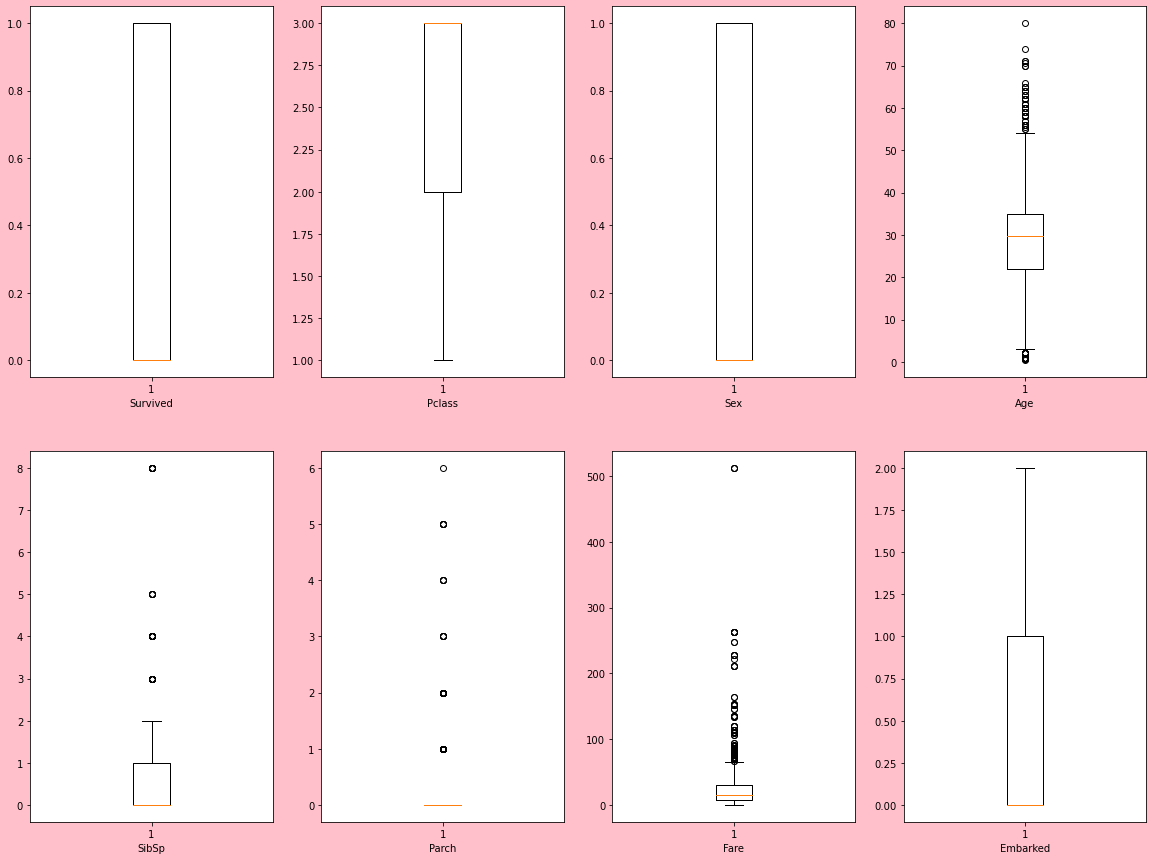

In [27]:
plt.figure(figsize=(20,15),facecolor='pink')
plotnumber=1

for column in titanic_data:
    if plotnumber<=12:
        ax=plt.subplot(2,4,plotnumber)
        plt.boxplot(titanic_data[column])
        plt.xlabel(column)
        
    plotnumber+=1
plt.show()

outliers is present in age sibsp and fare columns

# removing outliers by zscore method

In [29]:
from scipy.stats import zscore 

In [30]:
z=np.abs(zscore(titanic_data))

In [31]:
threshold=3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
       5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
       4, 4, 3, 5, 4, 5], dtype=int64))


In [32]:
titanic_data1=titanic_data[(z<3).all(axis=1)]

In [33]:
titanic_data1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0
887,1,1,1,19.000000,0,0,30.0000,0
888,0,3,1,29.699118,1,2,23.4500,0
889,1,1,0,26.000000,0,0,30.0000,1


removed the outliers

In [34]:
titanic_data1.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000
mean,0.390244,2.310976,0.342683,29.792831,0.348780,0.254878,25.836051,0.359756
std,0.488103,0.826678,0.474896,12.151418,0.619434,0.565308,29.817529,0.635606
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,23.000000,0.000000,0.000000,7.895800,0.000000
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,13.000000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,27.000000,1.000000
max,1.000000,3.000000,1.000000,66.000000,3.000000,2.000000,164.866700,2.000000


In [35]:
#checking the skewness
titanic_data1.skew().sort_values(ascending=False)

Fare        2.318761
Parch       2.122629
SibSp       1.979577
Embarked    1.552592
Sex         0.664152
Survived    0.450825
Age         0.318314
Pclass     -0.632242
dtype: float64

# Let’s split the data into the target and feature variables.

In [36]:
X = titanic_data1.drop(columns = ['Survived'],axis=1)
Y = titanic_data1['Survived']

# Removing Skewness using Power Transform

In [37]:
from sklearn.preprocessing import power_transform

In [38]:
x1=power_transform(X)

In [39]:
pd.DataFrame(x1).skew().sort_values(ascending=False)

4    1.581505
6    1.023876
3    0.948944
1    0.664152
2    0.071813
5   -0.018602
0   -0.429718
dtype: float64

In [40]:
pd.DataFrame(x1, columns = X.columns).skew().sort_values(ascending=False)

Parch       1.581505
Embarked    1.023876
SibSp       0.948944
Sex         0.664152
Age         0.071813
Fare       -0.018602
Pclass     -0.429718
dtype: float64

skewness is removed

Now, we will be splitting the data into four variables, namely, X_train, Y_train, X_test, Y_test.

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [42]:
X_train.shape

(656, 7)

In [43]:
Y_train.shape

(656,)

In [44]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
219,2,0,30.000000,0,0,10.5000,0
602,1,0,29.699118,0,0,42.4000,0
293,3,1,24.000000,0,0,8.8500,0
868,3,0,29.699118,0,0,9.5000,0
862,1,1,48.000000,0,0,25.9292,0
...,...,...,...,...,...,...,...
143,3,0,19.000000,0,0,6.7500,2
445,1,0,4.000000,0,2,81.8583,0
836,3,0,21.000000,0,0,8.6625,0
543,2,0,32.000000,1,0,26.0000,0


In [45]:
Y_test.shape

(164,)

# Using logistic Regression model

In [46]:
model = LogisticRegression()

Now let us train the model, with our training values(X_train , Y_train)

In [47]:
model.fit(X_train, Y_train)

LogisticRegression()

# Checking the Accuracy:

In [48]:
X_train_prediction = model.predict(X_train)

In [49]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)


Accuracy score of training data :  0.7865853658536586


# saving the model in pickel format

In [50]:
import joblib
joblib.dump(titanic_data1,"titanic_data1")

['titanic_data1']